# Dataproject: Air Traffic Passengers

**Important**: Before running the provided code, please ensure that the geopandas package is installed in your Python environment to avoid any errors. If it's not already installed, you can do so by opening your command line or terminal and executing the following command: **pip install geopandas**

**Introduction:**

In this project, we will explore data from **[INSERT SOURCE]** regarding the global numbers of air traffic passengers to illustrate the evolution of air travel worldwide. Utilizing Python, we will plot and visualize the true expansion of aviation, encompassing both global trends and regional, as well as country-specific developments.

Additionally, the project will involve extensive data cleaning, which will also be conducted using Python.


**Imports and set magics:**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

We start by importing the data from the excel file "airtraffic". 

In [16]:
filename = 'airtraffic.xlsx'

airt = pd.read_excel(filename)

Then we remove irrelevant data from the file and rename the columns: 

In [17]:
# These columns have to go: 'Unnamed: 0' 'Unnamed: 1' 'Unnamed: 2' 'Unnamed: 3'
drop_these = ['Country Code','Indicator Name','Indicator Code'] # use list comprehension to create list of columns
print(f"Columns that have been dropped: {drop_these}")

airt.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
airt = airt.dropna(subset=airt.columns[1:], how='all') # drop rows where all columns are NaN

world_index = airt[airt['Country Name'] == 'World'].index.tolist()

# Adding a datapoint to the world row for the year 1972 as an average of 1971 and 1973 as the dataset lacks this value
average_value = (airt.loc[world_index, '1971'] + airt.loc[world_index, '1973']) / 2
airt.loc[world_index, '1972'] = average_value

airt.head(5)

Columns that have been dropped: ['Country Code', 'Indicator Name', 'Indicator Code']


,Country Name,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,223502.00,2.742800e+05,NaN,NaN,NaN
1,Africa Eastern and Southern,3418300.0,3775300.0,4074500.0,4808000.0,5126100.0,5333100.0,6040400.0,5798900.0,6195600.0,...,3.583868e+07,3.511246e+07,3.635076e+07,39154692.0,41553429.0,45423814.08,5.261396e+07,5.485142e+07,1.916604e+07,2.405759e+07
2,Afghanistan,84700.0,97400.0,104900.0,96600.0,96100.0,99000.0,101700.0,111200.0,100400.0,...,1.737962e+06,2.044188e+06,2.209428e+06,1929907.0,1917924.0,1647425.00,1.125367e+06,1.066747e+06,4.490410e+05,2.932130e+05
3,Africa Western and Central,1167000.0,1238100.0,1285700.0,1453300.0,1685700.0,1987500.0,2540000.0,2962100.0,3543900.0,...,9.570162e+06,8.677884e+06,8.030237e+06,8696300.0,8129874.0,8837017.00,1.233777e+07,1.138491e+07,5.328945e+06,7.425487e+06
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,155400.0,282700.0,308000.0,...,1.132424e+06,1.321872e+06,1.409952e+06,1244491.0,1482546.0,1375523.00,1.516628e+06,1.436959e+06,3.566950e+05,3.114880e+05


Excluded entries: ['World', 'EU', 'High income', 'OECD members', 'North America', 'Europe & Central Asia', 'IDA & IBRD total', 'Low & middle income', 'IBRD only', 'Middle income', 'Upper middle income', 'Late-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'European Union', 'Euro area', 'Arab World', 'South Asia', 'IDA total']


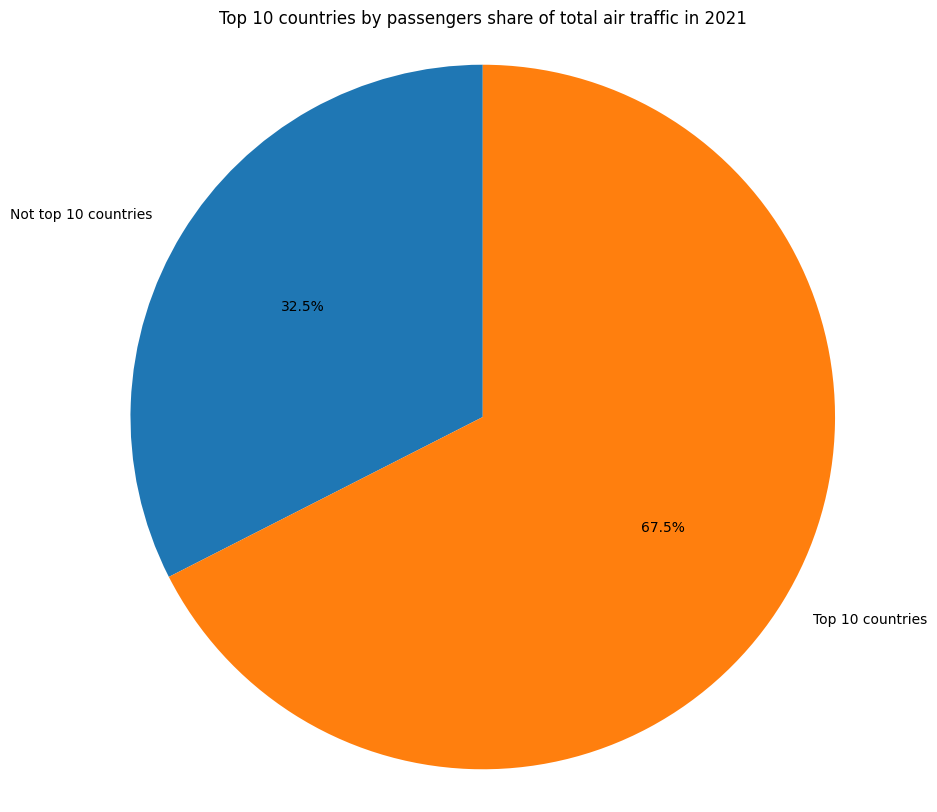

In [18]:
    # List of non-country regions to exclude generally
    non_countries = ['World', 'EU', 'High income', 'OECD members', 'North America', 'Europe & Central Asia',
        'IDA & IBRD total', 'Low & middle income', 'IBRD only', 'Middle income', 'Upper middle income',
        'Late-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)',
        'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'European Union',
        'Euro area', 'Arab World', 'South Asia', 'IDA total']

    # List of regions to specifically include despite general exclusion criteria
    include_specific = ['United Arab Emirates', 'Hong Kong SAR, China', "Korea, Dem. People's Rep."]

    # Adjust the exclusion list by removing the entries we want to include
    adjusted_non_countries = [region for region in non_countries if region not in include_specific]

    # Transposing the dataframe to have years as rows and setting the index
    plot_data = airt.set_index('Country Name').T

    # Identify entries to exclude based on being a non-country or having a name longer than 18 characters
    excluded_entries = adjusted_non_countries + [name for name in plot_data.columns if len(name) > 18]

    # Print excluded entries
    print("Excluded entries:", adjusted_non_countries)

    # Filter out non-country regions and long name countries from the DataFrame
    plot_data = plot_data.drop(adjusted_non_countries, axis=1, errors='ignore')

    # Finding the top 10 countries in 2021 by passengers
    top10_data = plot_data.loc['2021'].nlargest(10)

    # Adding a row to the DataFrame to indicate whether a country is in the top 10
    plot_data.loc['is_top_10'] = plot_data.loc['2021'].isin(top10_data)

    # Transposing the DataFrame to have countries as rows
    plot_data_T=plot_data.T

    # Grouping the data by the 'is_top_10' column and summing the values
    grouped = plot_data_T.groupby('is_top_10').sum()

    # Renaming the rows
    grouped = grouped.rename(index={False: 'Not top 10 countries', True: 'Top 10 countries'})

    # Finding the total sum of passengers by sum of the two rows
    total_sum = grouped.sum()

    # Calculating the percentage of passengers for each group
    percentage = (grouped / total_sum) * 100

    # Plotting the pie chart
    plt.figure(figsize=(10, 10))    
    plt.pie(percentage['2021'], labels=percentage.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Top 10 countries by passengers share of total air traffic in 2021')
    plt.show()

In [19]:
# Create a dictionary to rename the columns
col_dict = {}
for i in range(1970, 2021+1): 
    col_dict[str(i)] = f'y{i}'

# Rename the columns 
col_dict = {str(i) : f'y{i}' for i in range(1970,2021+1)}
col_dict

airt.rename(columns = col_dict, inplace=True)
airt.head(10)

,Country Name,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,...,y2012,y2013,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.235020e+05,2.742800e+05,NaN,NaN,NaN
1,Africa Eastern and Southern,3418300.0,3775300.0,4074500.0,4808000.0,5126100.0,5333100.0,6040400.0,5798900.0,6195600.0,...,3.583868e+07,3.511246e+07,3.635076e+07,39154692.0,41553429.0,4.542381e+07,5.261396e+07,5.485142e+07,1.916604e+07,2.405759e+07
2,Afghanistan,84700.0,97400.0,104900.0,96600.0,96100.0,99000.0,101700.0,111200.0,100400.0,...,1.737962e+06,2.044188e+06,2.209428e+06,1929907.0,1917924.0,1.647425e+06,1.125367e+06,1.066747e+06,4.490410e+05,2.932130e+05
3,Africa Western and Central,1167000.0,1238100.0,1285700.0,1453300.0,1685700.0,1987500.0,2540000.0,2962100.0,3543900.0,...,9.570162e+06,8.677884e+06,8.030237e+06,8696300.0,8129874.0,8.837017e+06,1.233777e+07,1.138491e+07,5.328945e+06,7.425487e+06
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,155400.0,282700.0,308000.0,...,1.132424e+06,1.321872e+06,1.409952e+06,1244491.0,1482546.0,1.375523e+06,1.516628e+06,1.436959e+06,3.566950e+05,3.114880e+05
5,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.143397e+05,8.658480e+05,1.516320e+05,NaN,26634.0,2.040900e+05,3.031370e+05,3.077410e+05,1.247140e+05,1.932590e+05
7,Arab World,4209300.0,4737000.0,5625600.0,6569400.0,8227100.0,10178000.0,13313000.0,16062400.0,18669700.0,...,1.520142e+08,1.662093e+08,1.816273e+08,195957046.0,214318723.0,2.234962e+08,2.326702e+08,2.462847e+08,7.820312e+07,1.008930e+08
8,United Arab Emirates,NaN,NaN,NaN,NaN,127500.0,173000.0,240100.0,299800.0,374500.0,...,5.994877e+07,6.815186e+07,7.560820e+07,84343562.0,91763598.0,9.530620e+07,9.575834e+07,9.399521e+07,2.611690e+07,2.842262e+07
9,Argentina,2332000.0,2218600.0,2358500.0,2312700.0,2943500.0,3299200.0,3293600.0,3884100.0,3946700.0,...,9.375670e+06,1.195128e+07,1.212191e+07,14245183.0,15076354.0,1.674927e+07,1.808455e+07,1.946138e+07,3.680874e+06,6.708097e+06
10,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.647330e+05,4.500000e+04,0.000000e+00,NaN,NaN,NaN,5.325900e+04,1.936680e+05,5.494000e+04,1.792000e+05


In [21]:
    # List of non-country regions to exclude generally
    non_countries = ['World', 'EU', 'High income', 'OECD members', 'North America', 'Europe & Central Asia',
        'IDA & IBRD total', 'Low & middle income', 'IBRD only', 'Middle income', 'Upper middle income',
        'Late-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)',
        'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'European Union',
        'Euro area', 'Arab World', 'South Asia', 'IDA total']

    # List of regions to specifically include despite general exclusion criteria
    include_specific = ['United Arab Emirates', 'Hong Kong SAR, China', "Korea, Dem. People's Rep."]

    # Adjust the exclusion list by removing the entries we want to include
    adjusted_non_countries = [region for region in non_countries if region not in include_specific]

    # Transposing the dataframe to have years as rows and setting the index
    plot_data = airt.set_index('Country Name').T

    # Identify entries to exclude based on being a non-country or having a name longer than 18 characters
    excluded_entries = adjusted_non_countries + [name for name in plot_data.columns if len(name) > 18]

    # Print excluded entries
    print("Excluded entries:", adjusted_non_countries)

    # Filter out non-country regions and long name countries from the DataFrame
    plot_data = plot_data.drop(adjusted_non_countries, axis=1, errors='ignore')

    # Finding the top 10 countries in 2021 by passengers
    top10_data = plot_data.loc['y2021'].nlargest(10)

    # Adding a row to the DataFrame to indicate whether a country is in the top 10
    plot_data.loc['is_top_10'] = plot_data.loc['y2021'].isin(top10_data)

    # Transposing the DataFrame to have countries as rows
    plot_data_T=plot_data.T

    # Grouping the data by the 'is_top_10' column and summing the values
    grouped = plot_data_T.groupby('is_top_10').sum()

    # Renaming the rows
    grouped = grouped.rename(index={False: 'Not top 10 countries', True: 'Top 10 countries'})

    # Finding the total sum of passengers by sum of the two rows
    total_sum = grouped.sum()

    # Calculating the percentage of passengers for each group
    percentage = (grouped / total_sum) * 100

    # Plotting the pie chart
    plt.figure(figsize=(10, 10))    
    plt.pie(percentage['2021'], labels=percentage.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Top 10 countries by passengers share of total air traffic in 2021')
    plt.show()

Excluded entries: ['World', 'EU', 'High income', 'OECD members', 'North America', 'Europe & Central Asia', 'IDA & IBRD total', 'Low & middle income', 'IBRD only', 'Middle income', 'Upper middle income', 'Late-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'European Union', 'Euro area', 'Arab World', 'South Asia', 'IDA total']


KeyError: '2021'

<Figure size 1000x1000 with 0 Axes>

## Explore the data set

In order to **explore the raw data**, we make two **interactive plots** to show the development in the number of air traffic passenger by year and by country. The first chart shows the 10 countries with the highest number of passengers in a given year. It is possible to change the year in the dropdown list. This figure only shows individual countries, as we have excluded a series of categories. These categories can be seen below.

In [ ]:
from dataproject import display_air_traffic

display_air_traffic(airt)

**Conclusion to the chart:** We observe that the United States ranks as the top country for air traffic passengers. However, in the last 10 years, China has significantly increased its market share.

**The second interactive plot** (see below) shows the development in the number of air traffic passengers from 1970-2021 for each country or category, one at a time. You access the plot for a specific country, region or category by filtering in the dropdown menu. This gives an insight in the growth in air traffic passengers in the periode 1970-2021. 

In 2020 we see a significant drop in number of passengers accross all regions and by all categories. This highlights the effects of the Covid-19 pandemic and lockdowns.

In [ ]:
from dataproject import display_air_traffic_interactive

display_air_traffic_interactive(airt)

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

**Underneath** we generate a plot based on the data covering all countries. Using the variable "World" we calculate and display the annual growth rates for the period 1970-2021 as well as the actual values to summarize the development in the number of air traffic passengers worldwide. Additionaly, the plot contains a 5 year forecast of the number of passengers, which is determined based on an ARIMA(1,1)-model.

In [ ]:
from dataproject import display_air_traffic_summarize

display_air_traffic_summarize(airt)

As seen in the plot above, the number of air passengers worldwide has been growing steadily in from 1970 until and including 2019. The annual growth rate has been positive for this entire period. We clearly see the effects of the pandemic causing a major drop in flight traffic resulting in a drop of around 60% in the number of passengers in 2020. Our forecast for the period 2022-2026 shows only a minor increase in the number of passengers. This forecast clearly does not account for the effects of the pandemic and is likely to be inaccurate. We would expect the number of passengers to return to the level as seen before COVID-19 within the first years of the forecasting period.

In [ ]:
    # List of non-country regions to exclude generally
    non_countries = ['World', 'EU', 'High income', 'OECD members', 'North America', 'Europe & Central Asia',
        'IDA & IBRD total', 'Low & middle income', 'IBRD only', 'Middle income', 'Upper middle income',
        'Late-demographic dividend', 'East Asia & Pacific', 'East Asia & Pacific (IDA & IBRD countries)',
        'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'European Union',
        'Euro area', 'Arab World', 'South Asia', 'IDA total']

    # List of regions to specifically include despite general exclusion criteria
    include_specific = ['United Arab Emirates', 'Hong Kong SAR, China', "Korea, Dem. People's Rep."]

    # Adjust the exclusion list by removing the entries we want to include
    adjusted_non_countries = [region for region in non_countries if region not in include_specific]

    # Transposing the dataframe to have years as rows and setting the index
    plot_data = airt.set_index('Country Name').T

    # Identify entries to exclude based on being a non-country or having a name longer than 18 characters
    excluded_entries = adjusted_non_countries + [name for name in plot_data.columns if len(name) > 18]

    # Print excluded entries
    print("Excluded entries:", adjusted_non_countries)

    # Filter out non-country regions and long name countries from the DataFrame
    plot_data = plot_data.drop(adjusted_non_countries, axis=1, errors='ignore')

    # Finding the top 10 countries in 2021 by passengers
    top10_data = plot_data.loc['2021'].nlargest(10)

    # Adding a row to the DataFrame to indicate whether a country is in the top 10
    plot_data.loc['is_top_10'] = plot_data.loc['2021'].isin(top10_data)

    # Transposing the DataFrame to have countries as rows
    plot_data_T=plot_data.T

    # Grouping the data by the 'is_top_10' column and summing the values
    grouped = plot_data_T.groupby('is_top_10').sum()

    # Renaming the rows
    grouped = grouped.rename(index={False: 'Not top 10 countries', True: 'Top 10 countries'})

    # Finding the total sum of passengers by sum of the two rows
    total_sum = grouped.sum()

    # Calculating the percentage of passengers for each group
    percentage = (grouped / total_sum) * 100

    # Plotting the pie chart
    plt.figure(figsize=(10, 10))    
    plt.pie(percentage['2021'], labels=percentage.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Top 10 countries by passengers share of total air traffic in 2021')
    plt.show()

In [ ]:
from dataproject import pie_chart

pie_chart(airt)

To visualize how the air traffic passengers are distrubuted accros the globe, we display a world map as a heat map by showing the intensity of passengers by country:

In [ ]:
from dataproject import plot_heatmap_interactive

plot_heatmap_interactive()


# Conclusion

This data project has visualised the development in air traffic passengers from 1970-2021. The analysis highlights the significant impact of the COVID-19 pandemic on global air traffic, with a marked decline in passenger numbers during 2020. Despite forecasts predicting only a modest recovery, historical resilience in air travel suggests a potential return to pre-pandemic levels. The interactive visualizations developed herein offer insights into the temporal and regional variations in air traffic.